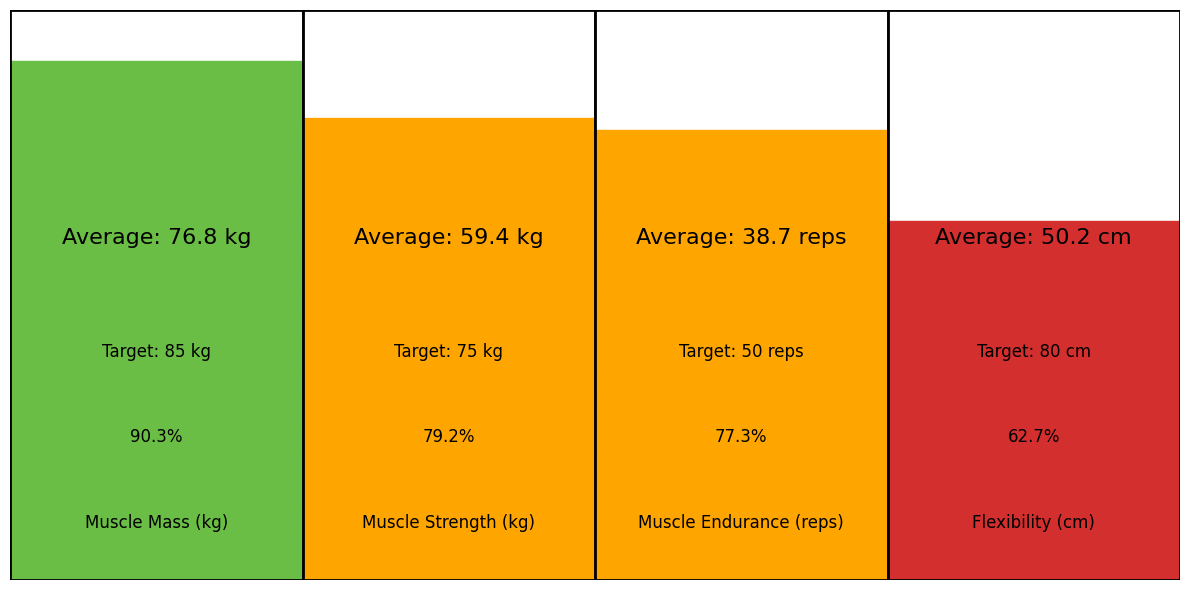

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Color function
def get_color(value, target):
    percentage = (value / target) * 100
    
    if percentage >= 85:  # Green for 85% and above
        return "#6BBE45"  # Matte Green
    elif percentage >= 70:  # Light orange for 70% to 85%
        return "#FFA500"  # Matte Orange
    else:  # Red for below 70%
        return "#D32F2F"  # Matte Red

# Example data for 30 days
np.random.seed(0)  # For reproducibility

# Parameters and target values
parameters = {
    "Muscle Mass (kg)": {"target": 85, "history": np.random.randint(70, 85, size=30).tolist()},
    "Muscle Strength (kg)": {"target": 75, "history": np.random.randint(50, 70, size=30).tolist()},
    "Muscle Endurance (reps)": {"target": 50, "history": np.random.randint(30, 50, size=30).tolist()},
    "Flexibility (cm)": {"target": 80, "history": np.random.randint(45, 60, size=30).tolist()},
}

# Card dimensions
card_width = 180
card_height = 100

# Calculate average values
averages = {param: np.mean(info["history"]) for param, info in parameters.items()}

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#110555')  # Background color
ax.set_xlim(0, card_width * len(parameters))
ax.set_ylim(0, card_height)

# Create cards
for i, (param, info) in enumerate(parameters.items()):
    average_value = averages[param]
    percentage = (average_value / info["target"]) * 100
    
    # Card background color
    color = get_color(average_value, info["target"])  # Get color from function
    
    # Card background
    ax.add_patch(Rectangle((i * card_width, 0), card_width, card_height, color='white', alpha=0.9))  # White background
    
    # Calculate fill height
    fill_height = (average_value / info["target"]) * card_height
    
    # Fill the area if there is any
    if fill_height > 0:  
        for j in range(0, int(fill_height), 2):  # Draw a line for every 2 units
            ax.add_patch(Rectangle((i * card_width, j), card_width, 3, color=color))  # Fill with color
    
    # Average measurement value
    unit = param.split("(")[1][:-1]  # Remove the last parenthesis
    ax.text((i + 0.5) * card_width, 60, f'Average: {average_value:.1f} {unit}', fontsize=16, ha='center', va='center', color='black')
    
    # Show target value
    ax.text((i + 0.5) * card_width, 40, f'Target: {info["target"]} {unit}', fontsize=12, ha='center', va='center', color='black')
    
    # Show percentage value
    ax.text((i + 0.5) * card_width, 25, f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='black')
    
    # Parameter name
    ax.text((i + 0.5) * card_width, 10, param, fontsize=12, ha='center', va='center', color='black')
    
    # Card border
    ax.add_patch(Rectangle((i * card_width, 0), card_width, card_height, edgecolor='black', facecolor='none', lw=2))  # Black border

# Hide axes
ax.axis('off')

# Save the figure
plt.tight_layout()
plt.savefig('physical_development_parameters_visual.png', format='png', dpi=300)  # Save as PNG
plt.show()  # Display the visualization


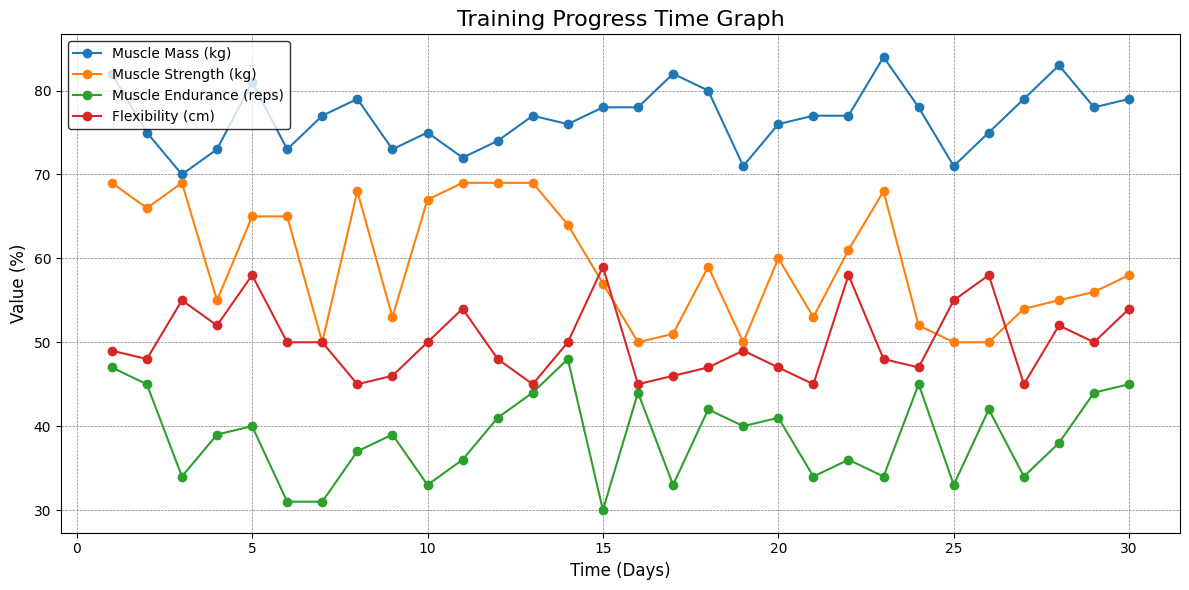

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Sample parameter data (random values for 30 days)
np.random.seed(0)  # For reproducibility
days = np.arange(1, 31)  # 30 days

# Parameters and target values
parameters = {
    "Muscle Mass (kg)": {"target": 85, "history": np.random.randint(70, 85, size=30)},  # Random values between 70 and 85
    "Muscle Strength (kg)": {"target": 75, "history": np.random.randint(50, 70, size=30)},  # Random values between 50 and 70
    "Muscle Endurance (reps)": {"target": 50, "history": np.random.randint(30, 50, size=30)},  # Random values between 30 and 50
    "Flexibility (cm)": {"target": 80, "history": np.random.randint(45, 60, size=30)},  # Random values between 45 and 60
}

# Create a new subplot for the time graph
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.set_facecolor('white')  # Background color white

# Title for the time graph
ax2.set_title('Training Progress Time Graph', fontsize=16, color='black')  # Changed title
ax2.set_xlabel('Time (Days)', fontsize=12, color='black')
ax2.set_ylabel('Value (%)', fontsize=12, color='black')  # Changed label to percentage
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')

# Draw the time graph for each parameter
for param, info in parameters.items():
    ax2.plot(days, info["history"], marker='o', label=param)  # Plot all day data

ax2.legend(facecolor='white', edgecolor='black', fontsize=10, loc='upper left')  # Changed legend background color
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the graph
plt.tight_layout()
plt.savefig('training_progress_time_graph.png', format='png', dpi=300)  # Saved in PNG format with 300 DPI resolution

# Show the plot
plt.show()


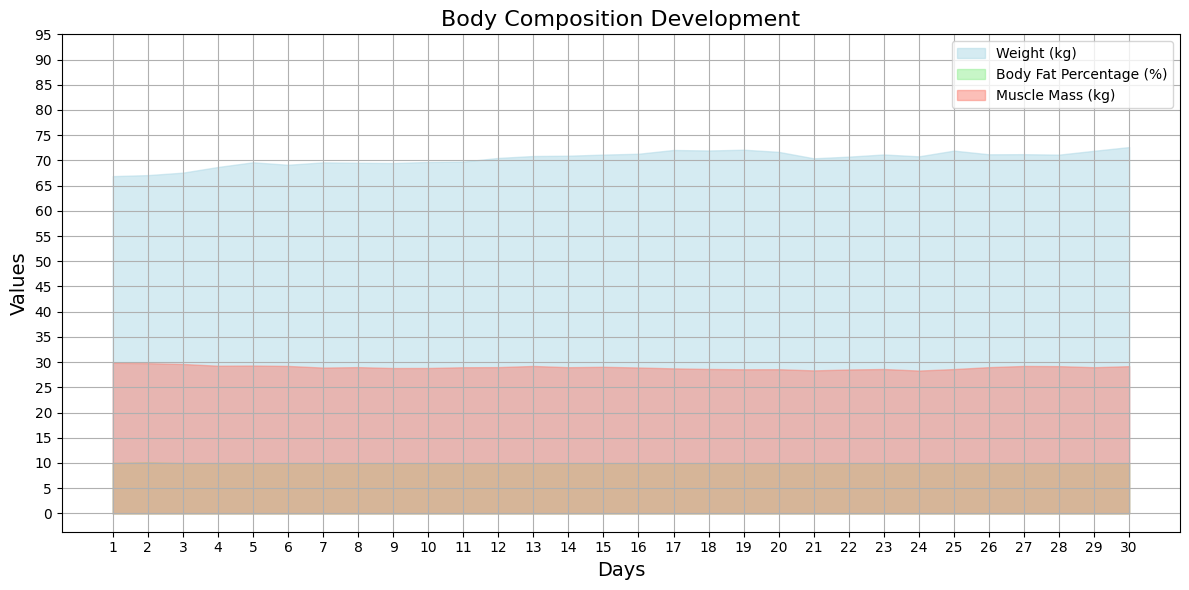

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Set seed for random data generation
np.random.seed(0)

# Days
days = np.arange(1, 31)  # 30 days

# Body composition data (example)
weight = 66 + np.random.normal(0, 0.5, size=30).cumsum()  # Weight (kg)
body_fat_percentage = np.clip(10 + np.random.normal(0, 0.3, size=30).cumsum(), 10, 25)  # Body Fat Percentage (%)
muscle_mass = 30 + np.random.normal(0, 0.2, size=30).cumsum()  # Muscle Mass (kg)

# Create the plot
plt.figure(figsize=(12, 6))
plt.fill_between(days, weight, color='lightblue', alpha=0.5, label='Weight (kg)')
plt.fill_between(days, body_fat_percentage, color='lightgreen', alpha=0.5, label='Body Fat Percentage (%)')
plt.fill_between(days, muscle_mass, color='salmon', alpha=0.5, label='Muscle Mass (kg)')

# Set axis labels and title
plt.title('Body Composition Development', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(days)
plt.yticks(np.arange(0, 100, 5))
plt.legend(loc='upper right')

# Draw the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('body_composition_development.png', format='png', dpi=300)  # Save as PNG
plt.show()  # Display the plot


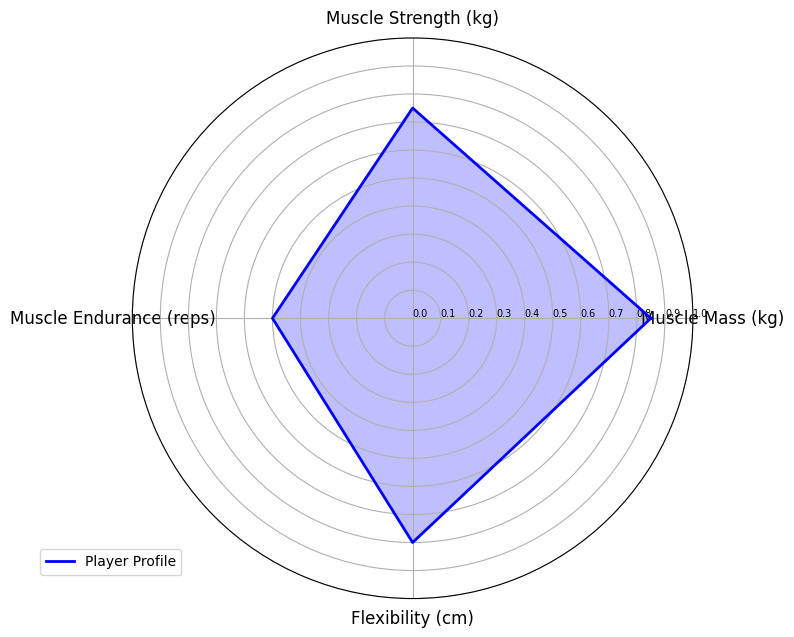

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and target values
parameters = {
    "Muscle Mass (kg)": {"target": 85, "history": np.random.randint(70, 85, size=30)},  # Random values between 70 and 85
    "Muscle Strength (kg)": {"target": 75, "history": np.random.randint(50, 70, size=30)},  # Random values between 50 and 70
    "Muscle Endurance (reps)": {"target": 50, "history": np.random.randint(30, 50, size=30)},  # Random values between 30 and 50
    "Flexibility (cm)": {"target": 80, "history": np.random.randint(45, 60, size=30)},  # Random values between 45 and 60
}

# Define categories and their corresponding values (normalized for radar chart)
categories = list(parameters.keys())
values = [parameters[param]["target"] / 100 for param in categories]  # Normalize values for the chart (0 to 1)

# Number of variables
N = len(categories)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Complete the loop
values = values + values[:1]
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks(np.arange(0, 1.1, 0.1), color='black', size=7)  # Adjust y-ticks for normalized values
plt.ylim(0, 1)  # Set y-limits for normalized values

# Plot data
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid', label='Player Profile')
ax.fill(angles, values, color='blue', alpha=0.25)

# Add a title and legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.tight_layout()
plt.savefig('multi_dimensional_profile.png', format='png', dpi=300)  # Save as PNG
plt.show()  # Display the plot


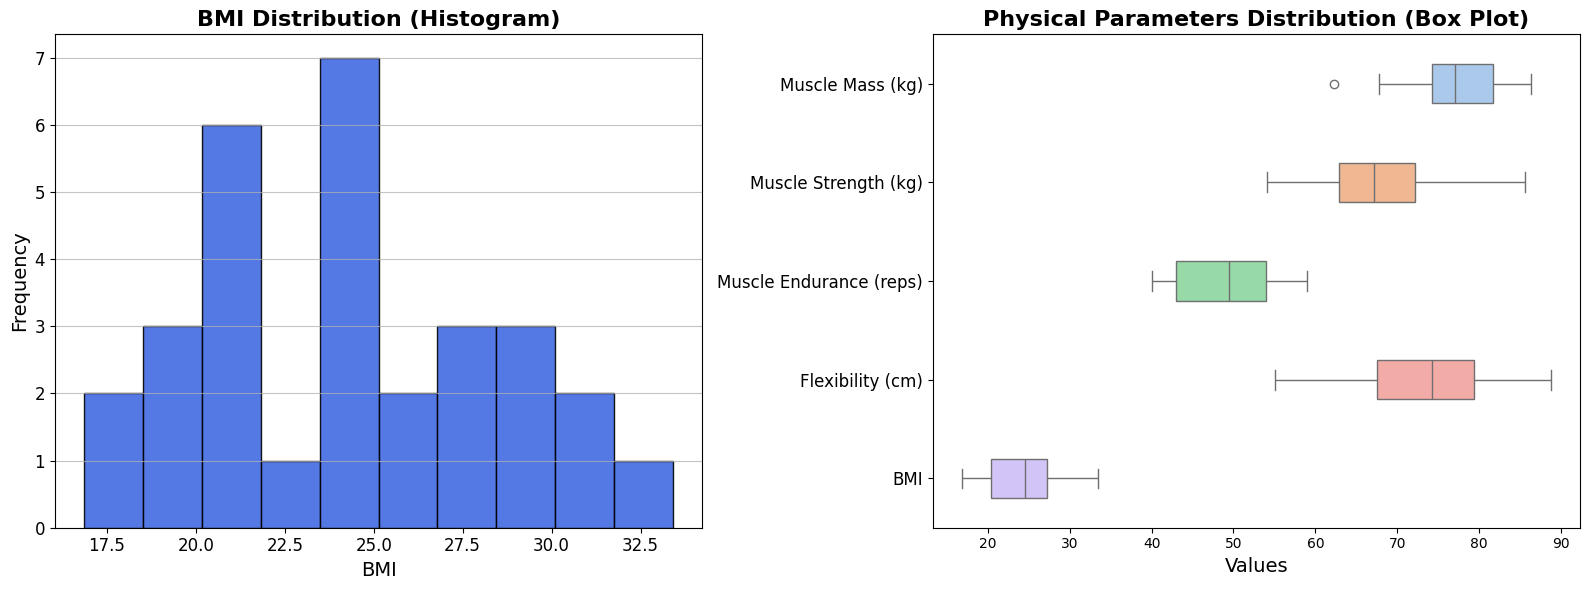

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek fiziksel parametre verileri (örnek 30 futbolcu için)
np.random.seed(0)  # Tekrar üretilebilirlik için tohum ayarı
num_players = 30

# Örnek veriler
muscle_mass = np.random.normal(loc=75, scale=5, size=num_players)  # Kas kütlesi (kg)
muscle_strength = np.random.normal(loc=70, scale=8, size=num_players)  # Kas gücü (kg)
muscle_endurance = np.random.randint(40, 60, size=num_players)  # Kas dayanıklılığı (tekrar)
flexibility = np.random.normal(loc=70, scale=10, size=num_players)  # Esneklik (cm)
heights = np.random.uniform(1.70, 1.90, size=num_players)  # Boy (m)
weights = np.random.normal(loc=80, scale=10, size=num_players)  # Ağırlık (kg)

# BMI Hesaplama
bmi = weights / (heights ** 2)

# Grafik ayarları
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(bmi, bins=10, color='royalblue', edgecolor='black', alpha=0.9)
plt.title('BMI Distribution (Histogram)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=[muscle_mass, muscle_strength, muscle_endurance, flexibility, bmi], 
             palette="pastel", orient="h", width=0.4)
plt.title('Physical Parameters Distribution (Box Plot)', fontsize=16, fontweight='bold')
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['Muscle Mass (kg)', 'Muscle Strength (kg)', 
                                          'Muscle Endurance (reps)', 'Flexibility (cm)', 'BMI'], fontsize=12)
plt.xlabel('Values', fontsize=14)

# Göster
plt.tight_layout()
plt.savefig('professional_physical_parameters_distribution_with_bmi.png', format='png', dpi=300)  # PNG olarak kaydet
plt.show()  # Grafiği göster


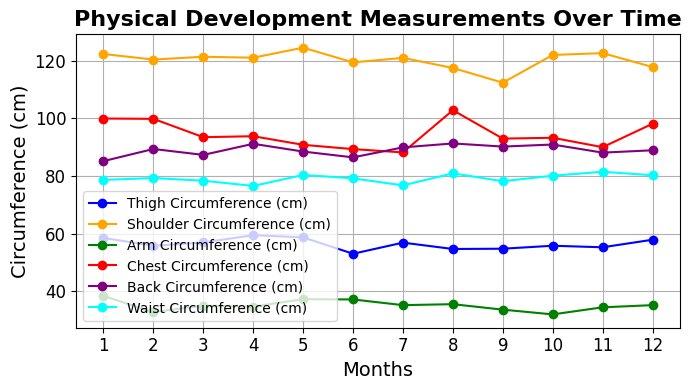

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Örnek veri: 6 fiziksel parametre için ölçümler (cm cinsinden)
np.random.seed(0)  # Tekrar üretilebilirlik için tohum ayarı
num_measurements = 12  # Aylık ölçümler
months = np.arange(1, num_measurements + 1)

# Örnek veriler
thigh_circumference = np.random.normal(loc=55, scale=2, size=num_measurements)  # Bacak çevresi
shoulder_circumference = np.random.normal(loc=120, scale=3, size=num_measurements)  # Omuz çevresi
arm_circumference = np.random.normal(loc=35, scale=1.5, size=num_measurements)  # Kol çevresi
chest_circumference = np.random.normal(loc=95, scale=4, size=num_measurements)  # Göğüs çevresi
back_circumference = np.random.normal(loc=90, scale=3, size=num_measurements)  # Sırt çevresi
waist_circumference = np.random.normal(loc=80, scale=2, size=num_measurements)  # Bel çevresi

# Grafik ayarları
plt.figure(figsize=(7, 4))  # 350x200 boyutuna karşılık gelen 7x4 inç boyutunda

# Çizgi grafikleri
plt.plot(months, thigh_circumference, marker='o', label='Thigh Circumference (cm)', color='blue')
plt.plot(months, shoulder_circumference, marker='o', label='Shoulder Circumference (cm)', color='orange')
plt.plot(months, arm_circumference, marker='o', label='Arm Circumference (cm)', color='green')
plt.plot(months, chest_circumference, marker='o', label='Chest Circumference (cm)', color='red')
plt.plot(months, back_circumference, marker='o', label='Back Circumference (cm)', color='purple')
plt.plot(months, waist_circumference, marker='o', label='Waist Circumference (cm)', color='cyan')

# Başlık ve etiketler
plt.title('Physical Development Measurements Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Circumference (cm)', fontsize=14)
plt.xticks(months, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Grafiği kaydet
plt.savefig('physical_development_measurements.png', format='png', dpi=300)  # PNG olarak kaydet
plt.show()  # Grafiği göster
